<a href="https://colab.research.google.com/github/granantuin/LEVX_class/blob/master/tensorflow_label_LEVX_dir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
from sklearn.metrics import confusion_matrix ,accuracy_score,f1_score,recall_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate
import seaborn as sns
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)



In [0]:
from google.colab import drive
drive.mount('/content/drive')


In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
drive_metar="/content/drive/My Drive/Colab Notebooks/model_vs_data/Metar_2018/"
dr=[drive_4km,drive_1km,drive_metar]
y_data=pd.read_excel(dr[2]+"y_LEVX_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[2]+"x_LEVX.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]# delete station errors
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result.iloc[:,9:10]

In [0]:
def evaluate():
  index=["E","N","NE","NW","S","SE","SW","W"]
  print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=index, columns=index))
  print("****************")
  print("Accuracy=","{:.2%}".format(accuracy_score(y_test, y_pred)),"// Model Accuracy=45%")
  results= precision_recall_fscore_support(y_test, y_pred, average=None, )
  df=pd.DataFrame({"Precision":results[0],"Recall":results[1],"F1":results[2],"W_DIR":index})
  df=df.set_index("W_DIR")
  print("Average precision =","{:.2%}".format(df["Precision"].mean()),"// Model precision=28%")
  print("Average recall =","{:.2%}".format(df["Recall"].mean()),"// Model recall=28%")
  results= precision_recall_fscore_support(y_test, y_pred, average='weighted', )
  print("Precision weighted=","{:.2%}".format(results[0]),"//Model weighted=56%")
  print("Recall weighted =","{:.2%}".format(results[1]),"//Model weighted=53%")
  print("****************")
  print(df)

**E=[1,0,0,0,0,0,0,0]
N=[0,1,0,0,0,0,0,0]
NE=[0,0,1,0,0,0,0,0]
NW=[0,0,0,1,0,0,0,0]
S=[0,0,0,0,1,0,0,0,0]
SE=[0,0,0,0,0,1,0,0]
SW=[0,0,0,0,0,0,1,0]
W=[0,0,0,0,0,0,0,1]**

In [0]:
y_data_tf=[]
for dir in y_data["value"]:
  if dir>22.5 and dir<67.5:
    y_data_tf.append([0,0,1,0,0,0,0,0])
  if dir>67.5 and dir<112.5:
    y_data_tf.append([1,0,0,0,0,0,0,0])
  if dir>112.5 and dir<157.5:
    y_data_tf.append([0,0,0,0,0,1,0,0])
  if dir>157.5 and dir<202.5:
    y_data_tf.append([0,0,0,0,1,0,0,0])
  if dir>202.5 and dir<247.5:
    y_data_tf.append([0,0,0,0,0,0,1,0]) 
  if dir>247.5 and dir<292.5:
    y_data_tf.append([0,0,0,0,0,0,0,1])
  if dir>292.5 and dir<337.5:
    y_data_tf.append([0,0,0,1,0,0,0,0])
  if dir>337.5 or dir<22.5:
    y_data_tf.append([0,1,0,0,0,0,0,0])  
y_data=np.asarray(y_data_tf)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________
Finished training the model


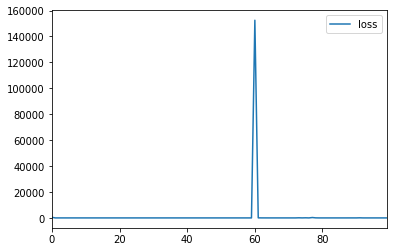

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.25, random_state=5)
l0 = tf.keras.layers.Dense(units=3, input_shape=[9]) 
l1= tf.keras.layers.Dense(units=8,)
l2 = tf.keras.layers.Dense(units=8,)
model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
model.summary()
history = model.fit(x_train, y_train, epochs=100, verbose=False)
print("Finished training the model")
pd.DataFrame(history.history).plot()
y_pred=model.predict(x_test)


E=[1,0,0,0,0,0,0,0] N=[0,1,0,0,0,0,0,0] NE=[0,0,1,0,0,0,0,0] NW=[0,0,0,1,0,0,0,0] S=[0,0,0,0,1,0,0,0,0] SE=[0,0,0,0,0,1,0,0] SW=[0,0,0,0,0,0,1,0] W=[0,0,0,0,0,0,0,1]

In [7]:
y_pred_str=[]
for c in y_pred:
  if np.argmax(c)==0:
    y_pred_str.append("E")
  if np.argmax(c)==1:
    y_pred_str.append("N")
  if np.argmax(c)==2:
    y_pred_str.append("NE")
  if np.argmax(c)==3:
    y_pred_str.append("NW")
  if np.argmax(c)==4:
    y_pred_str.append("S")
  if np.argmax(c)==5:
    y_pred_str.append("SE")
  if np.argmax(c)==6:
    y_pred_str.append("SW")
  if np.argmax(c)==7:
    y_pred_str.append("W")  
y_pred=np.asarray(y_pred_str)

y_test_str=[]
for c in y_test:
  if np.argmax(c)==0:
    y_test_str.append("E")
  if np.argmax(c)==1:
    y_test_str.append("N")
  if np.argmax(c)==2:
    y_test_str.append("NE")
  if np.argmax(c)==3:
    y_test_str.append("NW")
  if np.argmax(c)==4:
    y_test_str.append("S")
  if np.argmax(c)==5:
    y_test_str.append("SE")
  if np.argmax(c)==6:
    y_test_str.append("SW")
  if np.argmax(c)==7:
    y_test_str.append("W")  
y_test=np.asarray(y_test_str)
evaluate()

    E  N  NE  NW    S  SE  SW    W
E   0  0   0   0   30   0   0    3
N   0  4   0   0  165   0   0  108
NE  0  3   0   0  124   0   0   41
NW  0  1   0   0   35   0   0   33
S   0  0   0   0  418   0   0    9
SE  0  0   0   0    6   0   0    0
SW  0  0   0   0  349   0   0    9
W   0  0   0   0  265   0   0   74
****************
Accuracy= 29.58% // Model Accuracy=45%
Average precision = 13.34% // Model precision=28%
Average recall = 15.15% // Model recall=28%
Precision weighted= 21.31% //Model weighted=56%
Recall weighted = 29.58% //Model weighted=53%
****************
       Precision    Recall        F1
W_DIR                               
E       0.000000  0.000000  0.000000
N       0.500000  0.014440  0.028070
NE      0.000000  0.000000  0.000000
NW      0.000000  0.000000  0.000000
S       0.300287  0.978923  0.459593
SE      0.000000  0.000000  0.000000
SW      0.000000  0.000000  0.000000
W       0.267148  0.218289  0.240260


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
